# Part 1

In [45]:
import numpy as np
import gym
from gym import spaces
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [46]:
class MarioEnv(gym.Env):
    def __init__(self):
        super(MarioEnv, self).__init__()
        self.grid_size = 5
        self.state = [(x, y) for x in range(self.grid_size) for y in range(self.grid_size)]
        self.action = spaces.Discrete(4)

        self.rewards = {state: -1 for state in self.state}
        self.rewards[(4, 4)] = 10
        self.rewards[(0, 2)] = -5
        self.rewards[(4, 1)] = -5
        self.rewards[(3, 3)] = 5
        self.wall = [(1, 1), (2, 4)]
        self.base = (0, 0)
        self.current = self.base

    def reset(self):
        return self.base

    def step(self, action):
        x, y = self.current
        if action == 0:
            x = max(x - 1, 0)
        elif action == 1:
            x = min(x + 1, self.grid_size - 1)
        elif action == 2:
            y = max(y - 1, 0)
        elif action == 3:
            y = min(y + 1, self.grid_size - 1)

        if (x, y) in self.wall:
            x, y = self.current

        self.current = (x, y)
        reward = self.rewards.get(self.current, -1)
        if self.current == (4, 4):
            goal = True
        else:
            goal = False

        return self.current, reward, goal

    def render(self):
        fig, ax = plt.subplots(figsize=(6, 6))
        ax.set_xlim(0, self.grid_size)
        ax.set_ylim(0, self.grid_size)
        ax.set_xticks(np.arange(0, self.grid_size + 1, 1))
        ax.set_yticks(np.arange(0, self.grid_size + 1, 1))
        ax.grid(color="black")
        ax.set_aspect("equal")

        for (x, y), reward in self.rewards.items():
            color = "white"
            if reward == 10:
                color = "green"
            elif reward == -5:
                color = "red"
            elif reward == 5:
                color = "yellow"
            elif reward == -1:
                color = "gray"
            ax.add_patch(Rectangle((y, self.grid_size - 1 - x), 1, 1, color=color, alpha=0.5))

        for x, y in self.wall:
            ax.add_patch(Rectangle((y, self.grid_size - 1 - x), 1, 1, color="black", alpha=0.7))

        x_agent, y_agent = self.current
        ax.add_patch(Rectangle((y_agent, self.grid_size - 1 - x_agent), 1, 1, color="blue", alpha=0.7, label="Agent"))

        ax.legend(handles=[
            Rectangle((0, 0), 1, 1, color="green", alpha=0.5, label="Target"),
            Rectangle((0, 0), 1, 1, color="red", alpha=0.5, label="Penalty"),
            Rectangle((0, 0), 1, 1, color="yellow", alpha=0.5, label="Reward"),
            Rectangle((0, 0), 1, 1, color="black", alpha=0.7, label="Wall"),
            Rectangle((0, 0), 1, 1, color="blue", alpha=0.7, label="Agent")
        ], loc="upper right")

        plt.show()

In [47]:
env = MarioEnv()
state = env.reset()

Initial State: (0, 0)
Step 1: State=(0, 0), Action=Up, Reward=-1


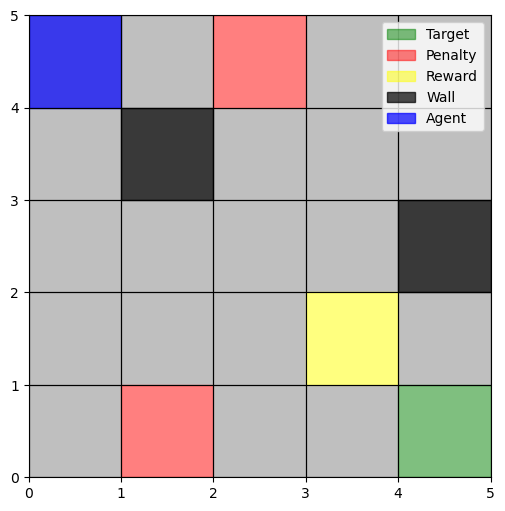

Step 2: State=(0, 0), Action=Left, Reward=-1


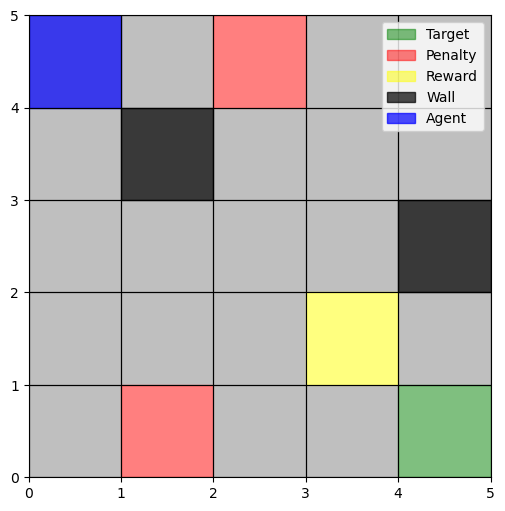

Step 3: State=(0, 1), Action=Right, Reward=-1


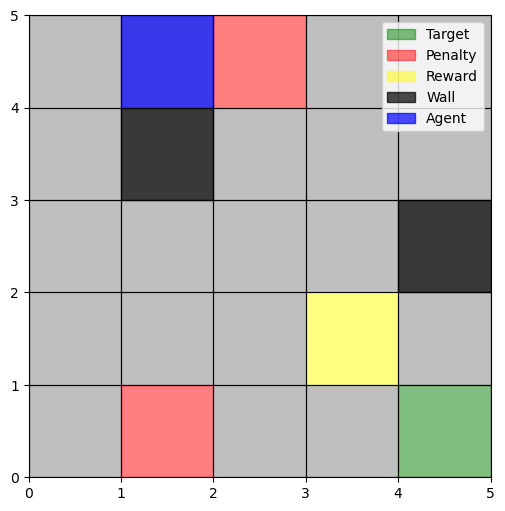

Step 4: State=(0, 2), Action=Right, Reward=-5


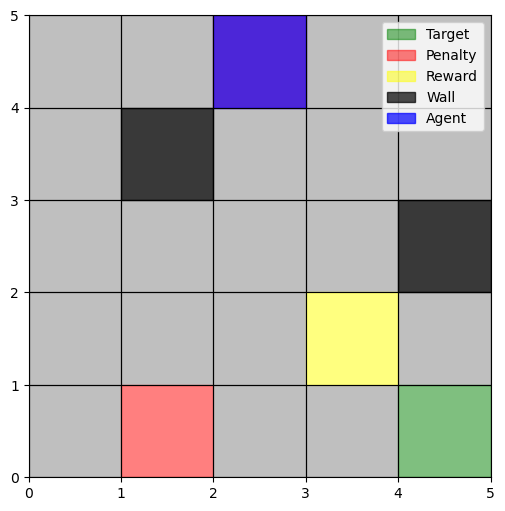

Step 5: State=(0, 1), Action=Left, Reward=-1


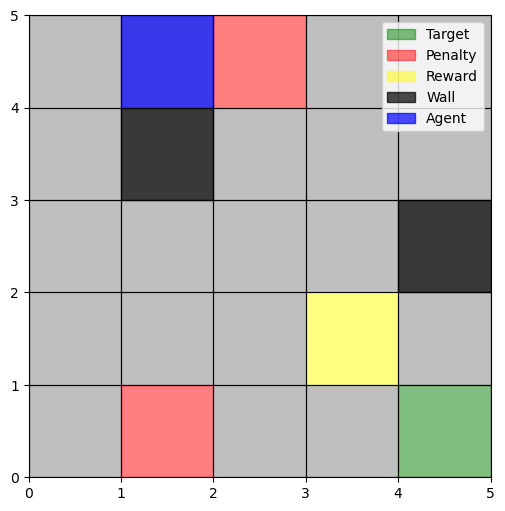

Step 6: State=(0, 1), Action=Up, Reward=-1


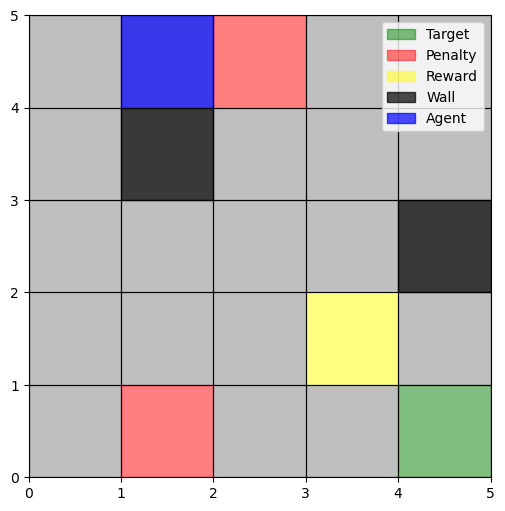

Step 7: State=(0, 2), Action=Right, Reward=-5


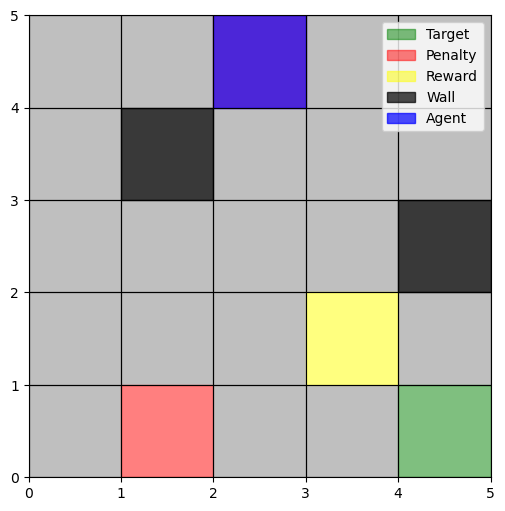

Step 8: State=(1, 2), Action=Down, Reward=-1


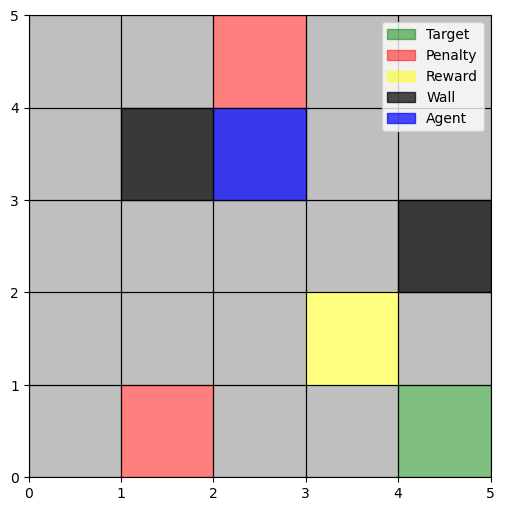

Step 9: State=(1, 2), Action=Left, Reward=-1


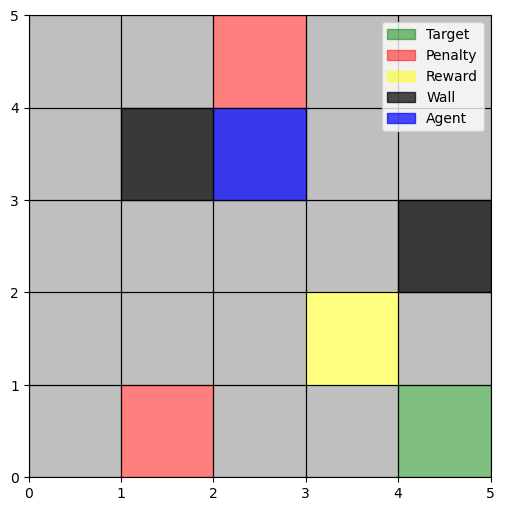

Step 10: State=(2, 2), Action=Down, Reward=-1


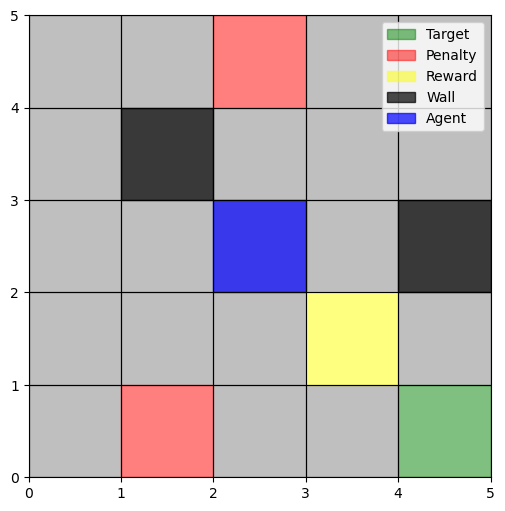

Step 11: State=(2, 3), Action=Right, Reward=-1


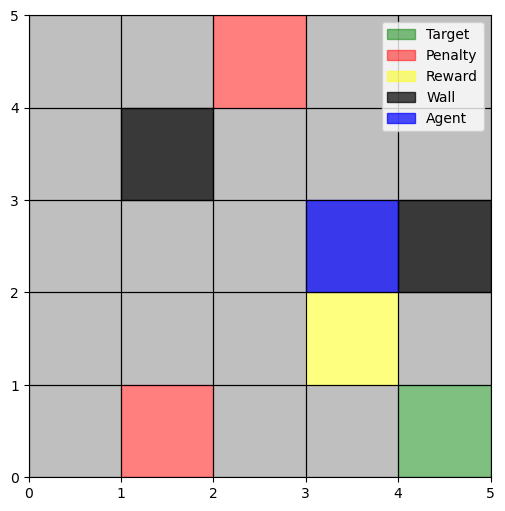

Step 12: State=(2, 2), Action=Left, Reward=-1


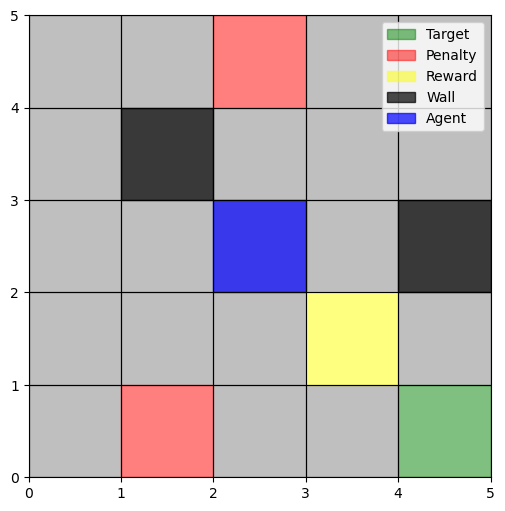

Step 13: State=(3, 2), Action=Down, Reward=-1


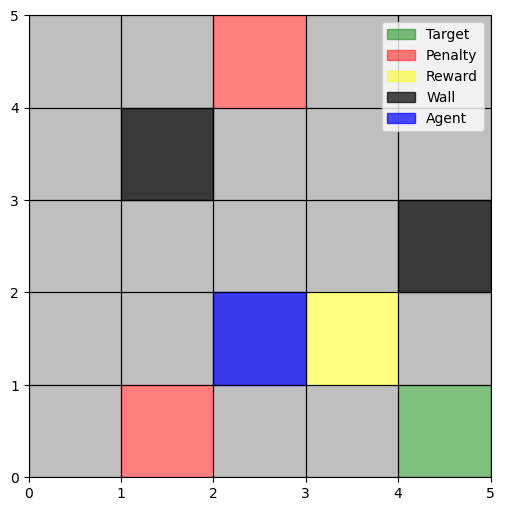

Step 14: State=(4, 2), Action=Down, Reward=-1


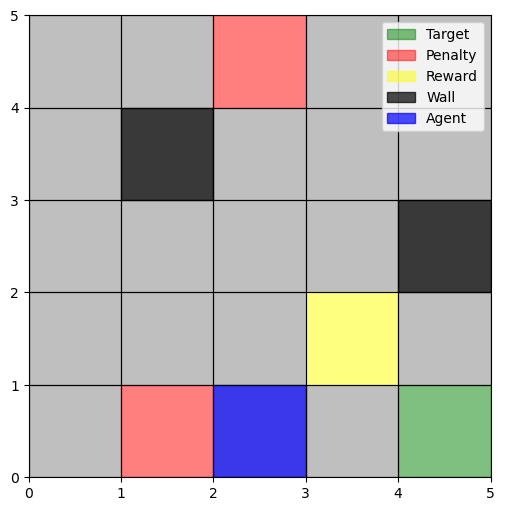

Step 15: State=(3, 2), Action=Up, Reward=-1


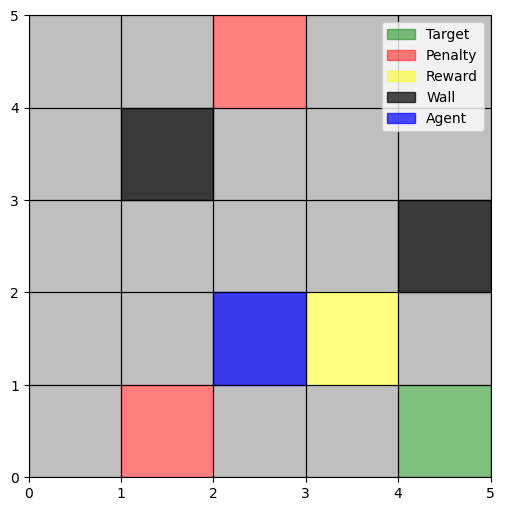

Step 16: State=(4, 2), Action=Down, Reward=-1


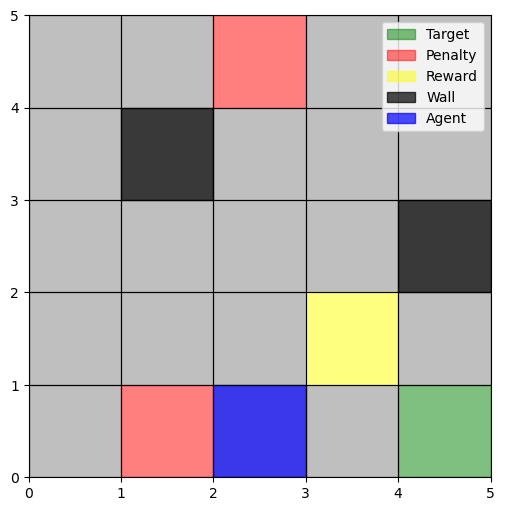

Step 17: State=(4, 2), Action=Down, Reward=-1


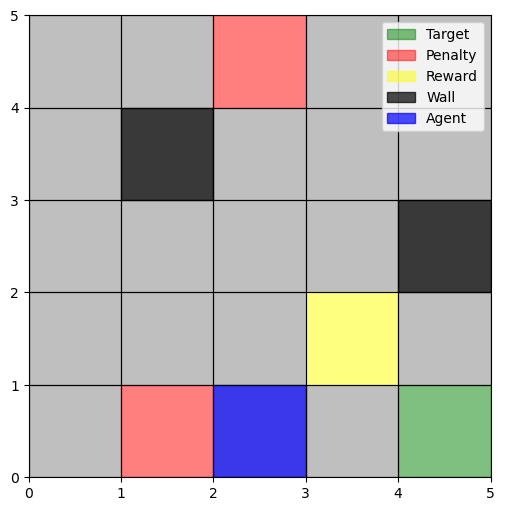

Step 18: State=(4, 3), Action=Right, Reward=-1


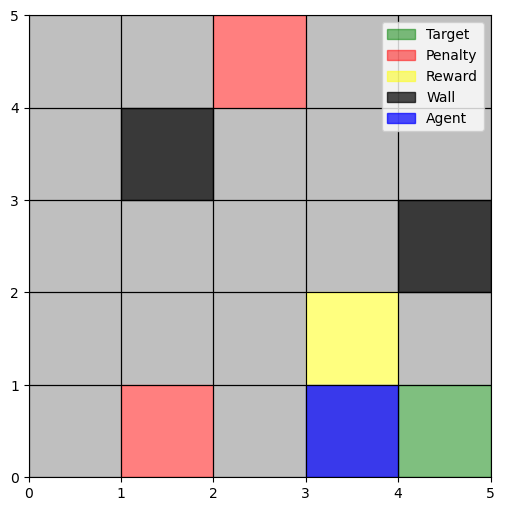

Step 19: State=(4, 4), Action=Right, Reward=10


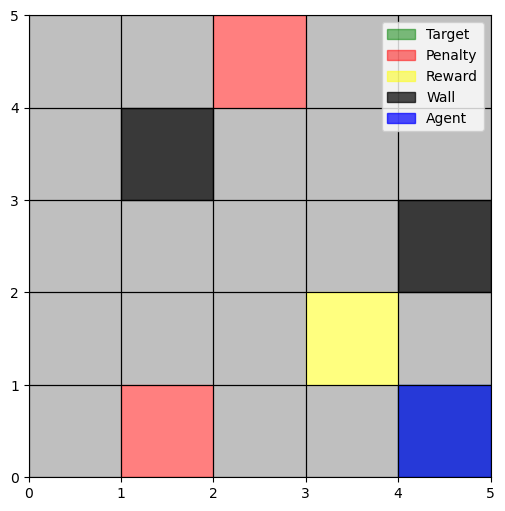

Goal reached!


In [48]:
print("Initial State:", state)
for steps in range(40):
    action = env.action.sample()
    next_state, reward, goal = env.step(action)
    directions = {0: "Up", 1: "Down", 2: "Left", 3: "Right"}
    print(f"Step {steps + 1}: State={next_state}, Action={directions[action]}, Reward={reward}")
    env.render()
    if goal:
        print("Goal reached!")
        break

# References

https://www.geeksforgeeks.org/what-is-reinforcement-learning/

https://www.geeksforgeeks.org/reinforcement-learning-in-python-implementing-sarsa-agent-in-taxi-environment/

https://www.geeksforgeeks.org/how-to-visualize-and-interact-with-environments-in-reinforcement-learning/

https://gymnasium.farama.org/introduction/train_agent/